In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
from __future__ import division
import os, sys
import numpy as np
import pandas as pd
from sklearn.utils import shuffle as reset
%matplotlib inline
import matplotlib.pyplot as plt
import random

In [3]:
def loadDataSet(fileName):
    return pd.read_csv(fileName, header=None, encoding='utf-8', sep='\t')

In [4]:
def train_test_split(data, test_size=0.3, shuffle=True, random_state=None):
    if shuffle:
        data = reset(data, random_state=random_state)
    train = data[int(len(data) * test_size):].reset_index(drop=True)
    test = data[:int(len(data) * test_size)].reset_index(drop=True)
    return train, test

In [5]:
def standRegres(xArr, yArr):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T  # list转换成mat
    xTx = xMat.T * xMat
    if np.linalg.det(xTx) == 0.0:  # 矩阵的逆可能并不存在，要在代码中对此作出判断
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T * yMat)
    return ws

In [6]:
def absError(yArr, yHatArr):
    return abs(yArr - yHatArr).sum() / len(yArr)


def distance(lon, lat):
    return 110 * sqrt(lon**2 + lat**2)

In [7]:
rawdata = loadDataSet('./data/typhoon.dat').iloc[:,:].values
random.shuffle(rawdata)
rawtraindata = rawdata[:300]
rawtestdata = rawdata[300:]

In [8]:
train = rawtraindata[:, :-2]
lonTrain = rawtraindata[:, -2]
latTrain = rawtraindata[:, -1]

In [9]:
test = rawtestdata[:, :-2]
lonTest = np.array(rawtestdata[:, -2])
latTest = np.array(rawtestdata[:, -1])
print(lonTrain.shape, latTrain.shape)

(300,) (300,)


In [10]:
wslat = standRegres(train, latTrain)
wslon = standRegres(train, lonTrain)

In [11]:
xMat = np.mat(train)
lonHatArr1 = xMat * wslon
np.corrcoef(lonHatArr1.T, lonTrain)

array([[1.       , 0.9537854],
       [0.9537854, 1.       ]])

In [12]:
xMat = np.mat(train)
latHatArr1 = xMat * wslat
np.corrcoef(latHatArr1.T, latTrain)

array([[1.       , 0.9455077],
       [0.9455077, 1.       ]])

In [13]:
xMat = np.mat(test)
latHatArr = xMat * wslat
np.corrcoef(latHatArr.T, latTest)

array([[1.        , 0.91630713],
       [0.91630713, 1.        ]])

In [14]:
xMat = np.mat(test)
lonHatArr = xMat * wslon
np.corrcoef(lonHatArr.T, lonTest)

array([[1.        , 0.94564198],
       [0.94564198, 1.        ]])

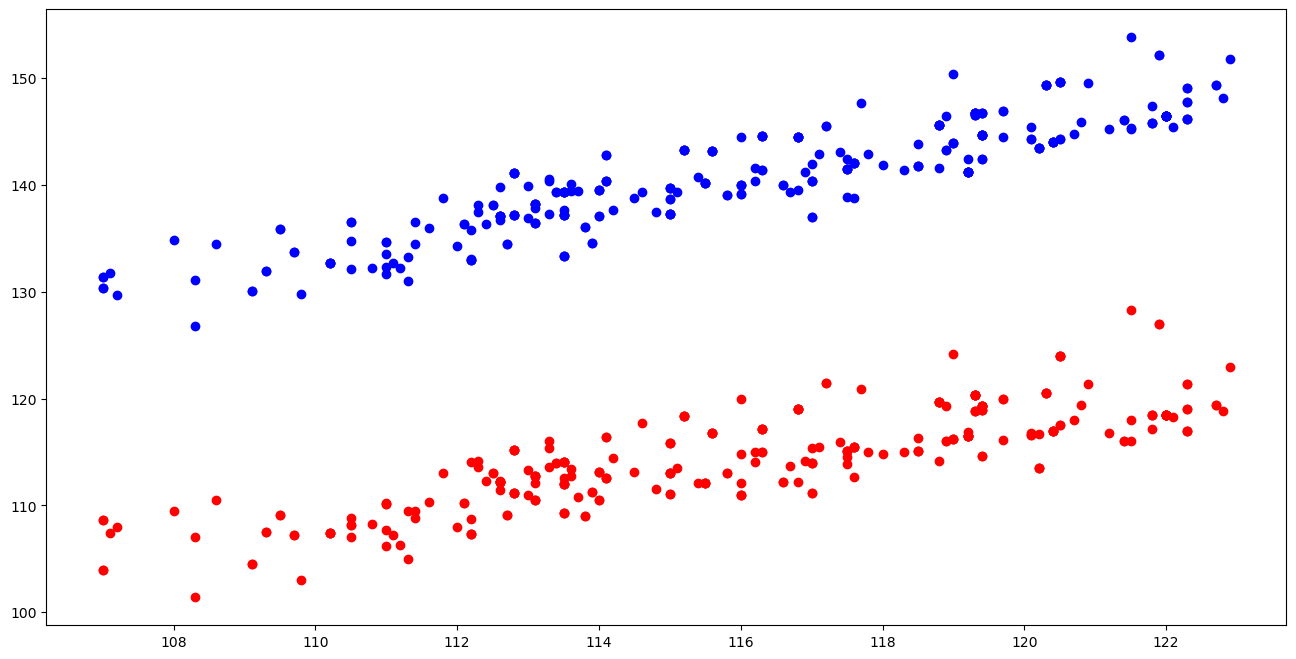

In [15]:
rawdata = pd.DataFrame(rawtraindata)
rawlon = rawdata.iloc[:, [0, 2]].values
rawlat = rawdata.iloc[:, [8, 9]].values
rawlonlab = rawdata.iloc[:, 16].values
rawlatlab = rawdata.iloc[:, 17].values
plt.figure(figsize=(16, 8))
plt.scatter(rawlon[:, 0], rawlonlab, color='red')
lonHatArr1 = np.squeeze(np.array(lonHatArr1))
plt.scatter(rawlon[:, 0], lonHatArr1, color='blue')
plt.savefig("1")

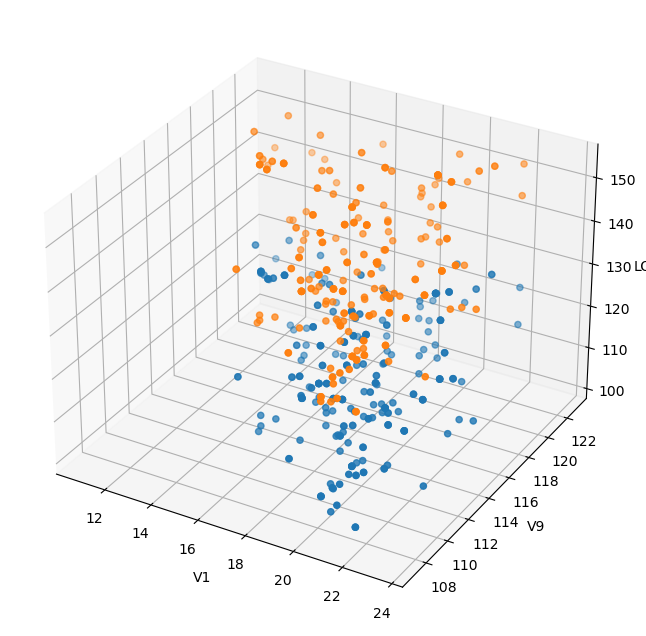

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rawlat[:, 0], rawlon[:, 0], rawlonlab)
ax.scatter(rawlat[:, 0], rawlon[:, 0], lonHatArr1)
ax.set_xlabel('V1')
ax.set_ylabel('V9')
ax.set_zlabel('LON')
plt.savefig("2")

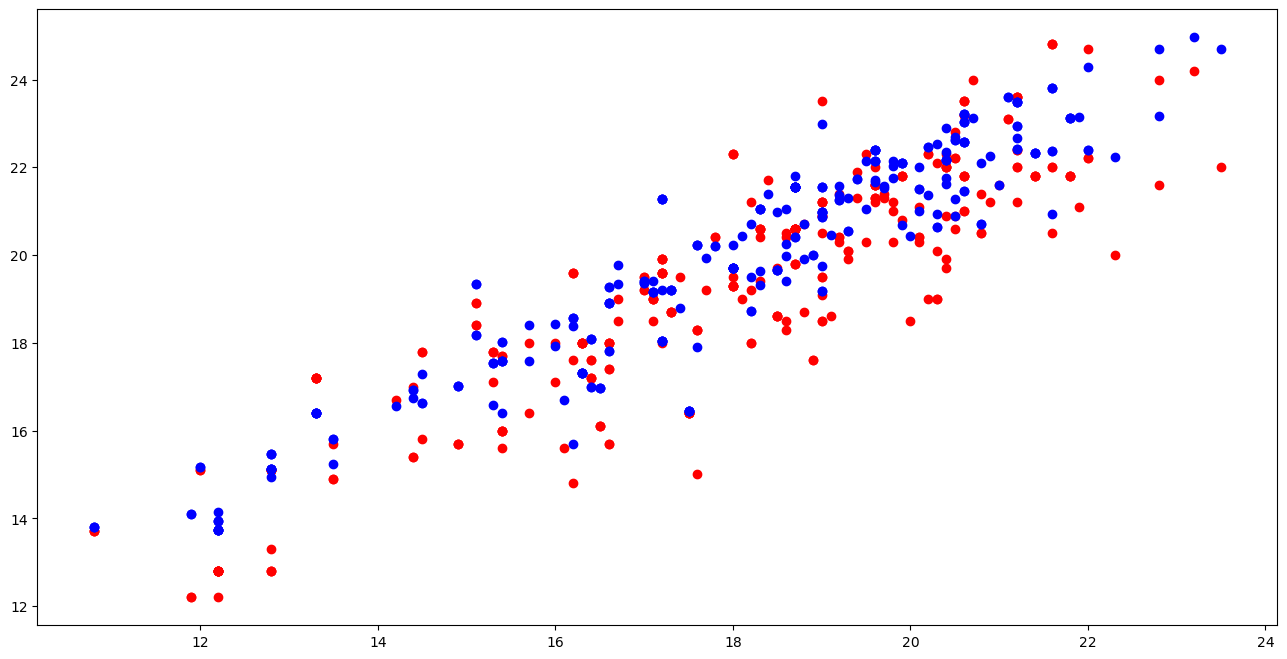

In [17]:
plt.figure(figsize=(16, 8))
plt.scatter(rawlat[:, 0], rawlatlab, color='red')
latHatArr1 = np.squeeze(np.array(latHatArr1))
plt.scatter(rawlat[:, 0], latHatArr1, color='blue')
plt.savefig("3")

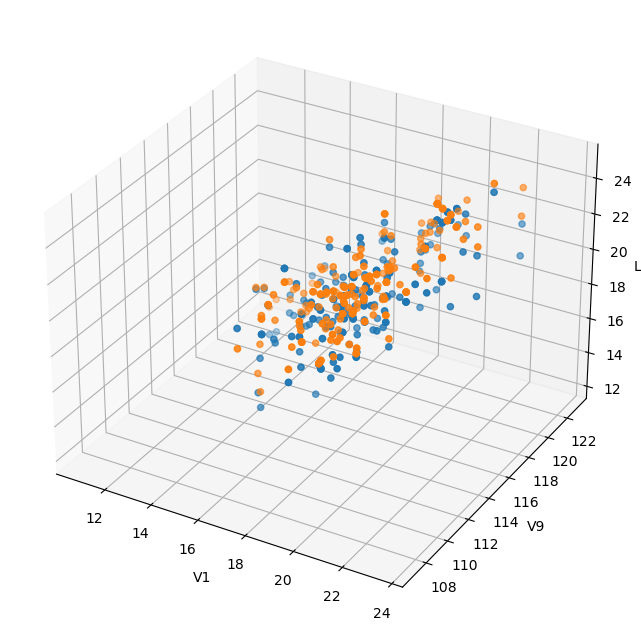

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rawlat[:, 0], rawlon[:, 0], rawlatlab)
ax.scatter(rawlat[:, 0], rawlon[:, 0], latHatArr1)
ax.set_xlabel('V1')
ax.set_ylabel('V9')
ax.set_zlabel('LON')
plt.savefig("4")

In [19]:
from sklearn import linear_model
from math import *

trainX = train
lonTrainY = lonTrain
latTrainY = latTrain
testX = test
lonTestY = lonTest
latTestY = latTest

In [20]:
clf = linear_model.LinearRegression()
#clf = linear_model.Ridge(alpha = 0.8)
clf.fit(trainX, lonTrainY)
lonYHat = clf.predict(testX)
clf.fit(trainX, latTrainY)
latYHat = clf.predict(testX)

In [21]:
absErrorLon = absError(lonTestY, lonYHat)
absErrorLat = absError(latTestY, latYHat)

In [22]:
lonYHat.shape

(200,)

In [23]:
lonTestY.shape

(200,)

In [24]:
np.corrcoef(lonYHat, lonTestY[:300])

array([[1.        , 0.94216329],
       [0.94216329, 1.        ]])

In [25]:
rawdata = loadDataSet('./data/typhoon.dat').iloc[:,:].values
random.shuffle(rawdata)
rawdata.shape

(500, 18)

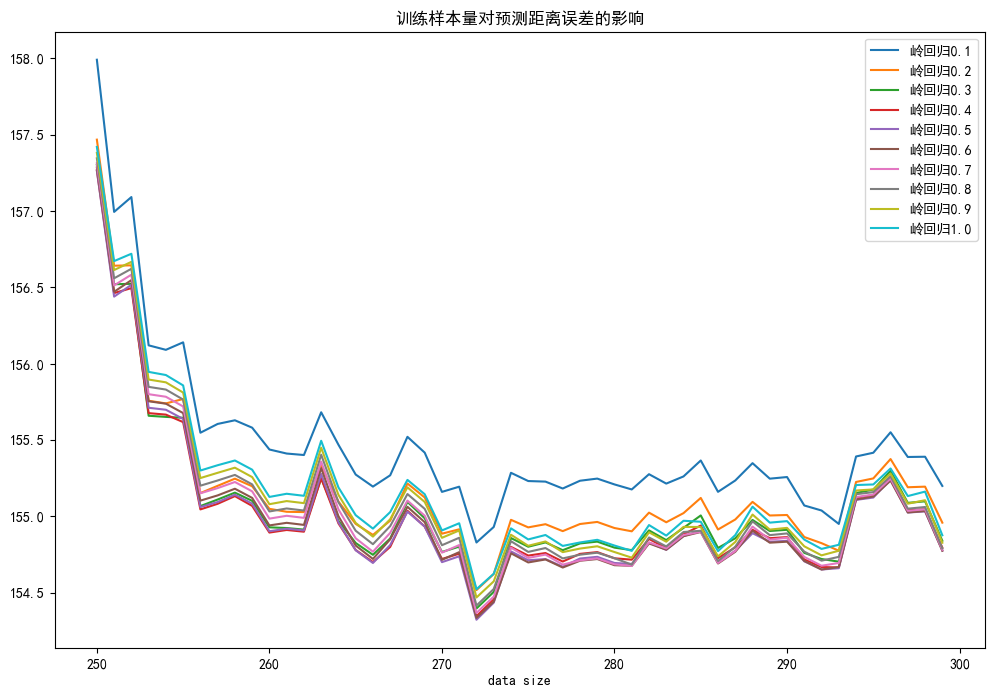

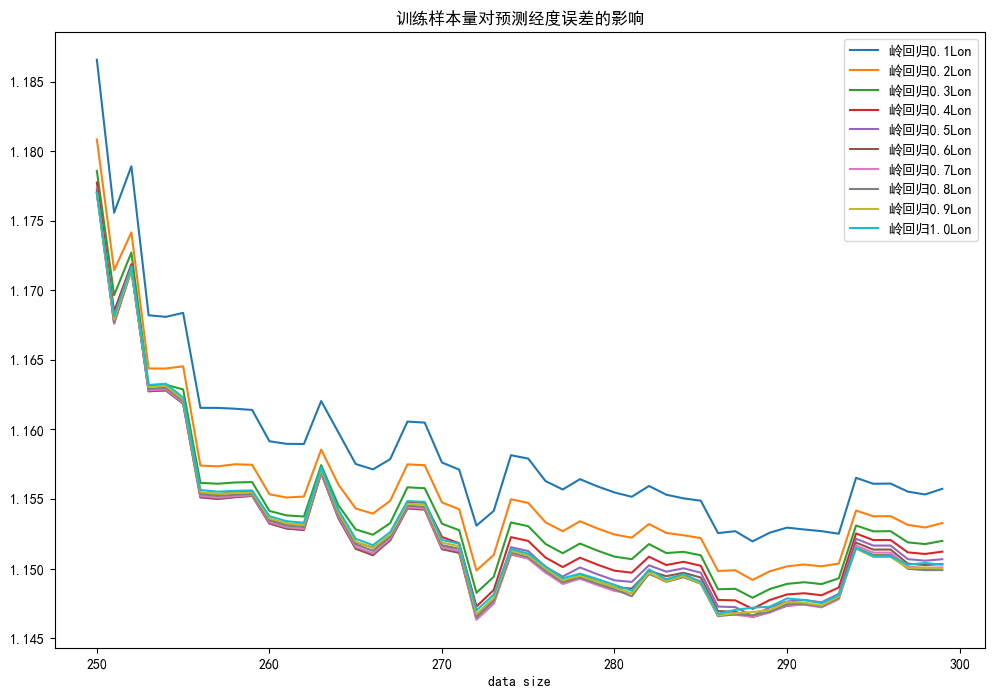

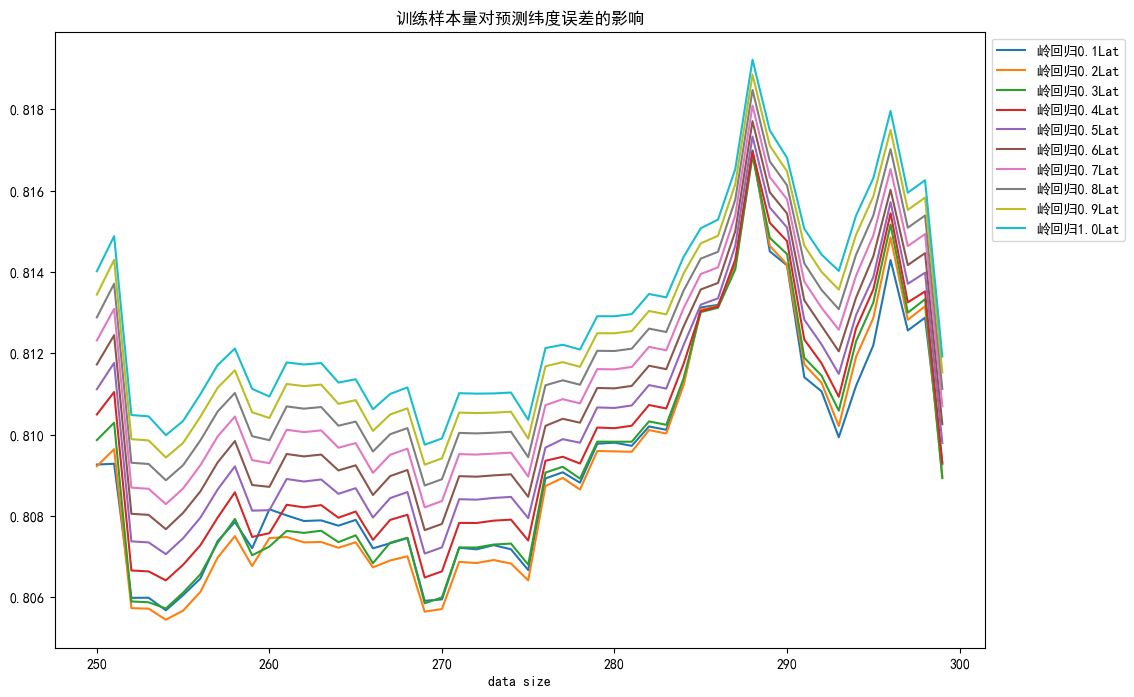

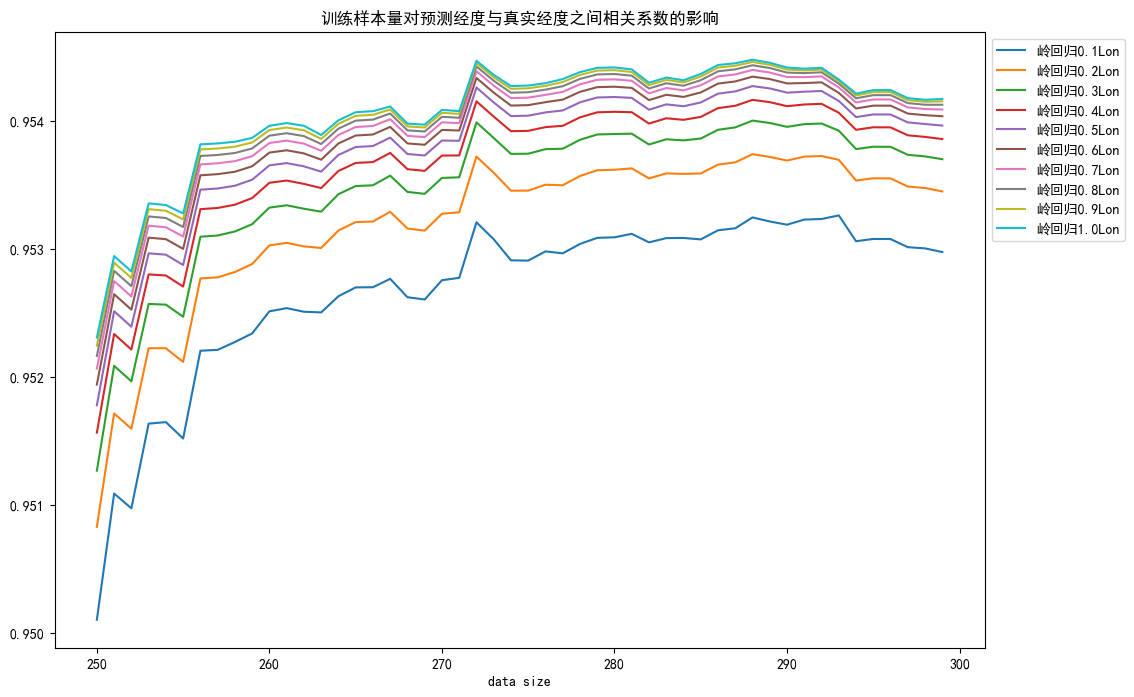

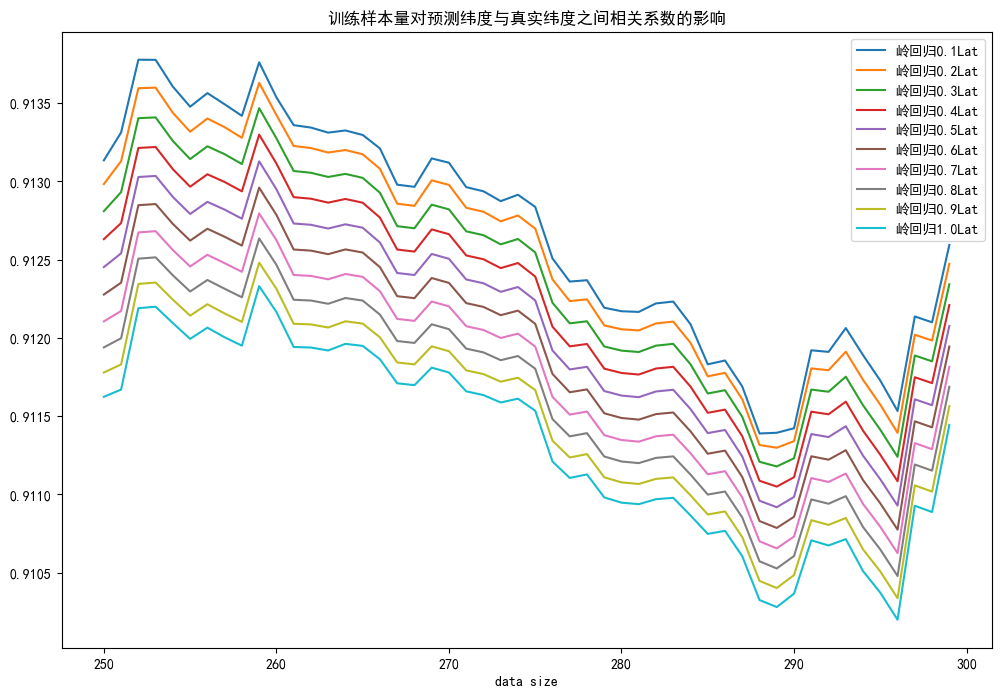

In [26]:
import matplotlib as mpl
import string
import pandas as pd

mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
import seaborn as sns

sns.set_style({"font.sans-serif": ['simhei', 'Arial']})

data_all = {'data size': []}
data_Lon_Err = {'data size': []}
data_Lat_Err = {'data size': []}
data_Lon_corr = {'data size': []}
data_Lat_corr = {'data size': []}

for i in range(1, 11):
    s = u'岭回归' + str(i / 10)
    data_all[s] = []
    data_Lon_Err[s + 'Lon'] = []
    data_Lat_Err[s + 'Lat'] = []
    data_Lon_corr[s + 'Lon'] = []
    data_Lat_corr[s + 'Lat'] = []

for train_num in range(250, 300, 1):
    rawtraindata = rawdata[:train_num]
    rawtestdata = rawdata[300:]
    trainX = rawtraindata[:, :-2]
    lonTrainY = rawtraindata[:, -2]
    latTrainY = rawtraindata[:, -1]
    testX = rawtestdata[:, :-2]
    lonTestY = np.array(rawtestdata[:, -2])
    latTestY = np.array(rawtestdata[:, -1])

    data_all['data size'].append(train_num)
    data_Lon_Err['data size'].append(train_num)
    data_Lat_Err['data size'].append(train_num)
    data_Lon_corr['data size'].append(train_num)
    data_Lat_corr['data size'].append(train_num)

    for i in range(1, 11):
        key = i / 10
        clf = linear_model.Ridge(alpha=key)  # 岭回归
        s = s = u'岭回归' + str(i / 10)
        # 构建模型
        clf.fit(trainX, lonTrainY)  # 训练经度模型
        lonyHat = clf.predict(testX)  # 使用经度模型去预测经度
        clf.fit(trainX, latTrainY)  # 训练纬度模型
        latyHat = clf.predict(testX)  # 使用纬度模型去预测纬度
        # 经度误差
        absErrorLon = absError(lonTestY, lonyHat)
        # 纬度误差
        absErrorLat = absError(latTestY, latyHat)
        absErrorLen = 110 * sqrt(absErrorLon**2 + absErrorLat**2)

        data_all[s].append(absErrorLen)
        data_Lon_Err[s + 'Lon'].append(absErrorLon)
        data_Lat_Err[s + 'Lat'].append(absErrorLat)
        data_Lon_corr[s + 'Lon'].append(np.corrcoef(lonyHat, lonTestY)[0][1])
        data_Lat_corr[s + 'Lat'].append(np.corrcoef(latyHat, latTestY)[0][1])
s = "岭回归"
titles = [
    u'训练样本量对预测距离误差的影响', u'训练样本量对预测经度误差的影响', u'训练样本量对预测纬度误差的影响',
    u'训练样本量对预测经度与真实经度之间相关系数的影响', u'训练样本量对预测纬度与真实纬度之间相关系数的影响'
]

data_all = pd.DataFrame(data_all)
data_all.set_index(['data size'], inplace=True)
data_all.plot(figsize=(12, 8), title=titles[0])

plt.legend(bbox_to_anchor=(1.0, 1))
plt.savefig(s + titles[0])

data_Lon_Err = pd.DataFrame(data_Lon_Err)
data_Lon_Err.set_index(['data size'], inplace=True)
data_Lon_Err.plot(kind='line', figsize=(12, 8), title=titles[1])
plt.legend(bbox_to_anchor=(1.0, 1))
plt.savefig(s + titles[1])

data_Lat_Err = pd.DataFrame(data_Lat_Err)
data_Lat_Err.set_index(['data size'], inplace=True)
data_Lat_Err.plot(kind='line', figsize=(12, 8), title=titles[2])
plt.legend(bbox_to_anchor=(1.0, 1))
plt.savefig(s + titles[2])

data_Lon_corr = pd.DataFrame(data_Lon_corr)
data_Lon_corr.set_index(['data size'], inplace=True)
data_Lon_corr.plot(kind='line', figsize=(12, 8), title=titles[3])
plt.legend(bbox_to_anchor=(1.0, 1))
plt.savefig(s + titles[3])

data_Lat_corr = pd.DataFrame(data_Lat_corr)
data_Lat_corr.set_index(['data size'], inplace=True)
data_Lat_corr.plot(kind='line', figsize=(12, 8), title=titles[4])
plt.legend(bbox_to_anchor=(1.0, 1))
plt.savefig(s + titles[4])

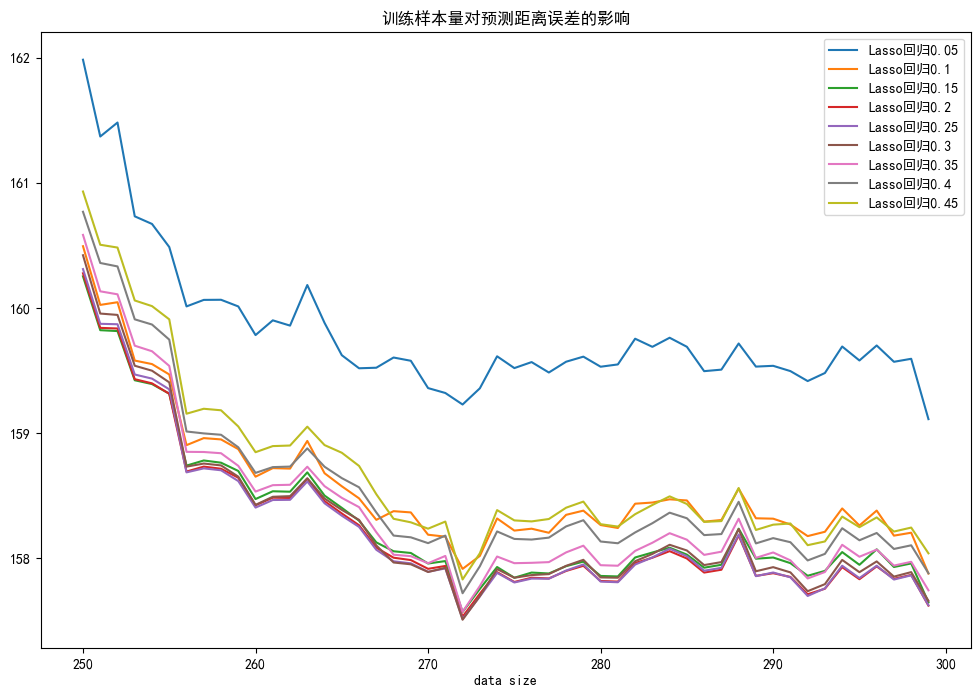

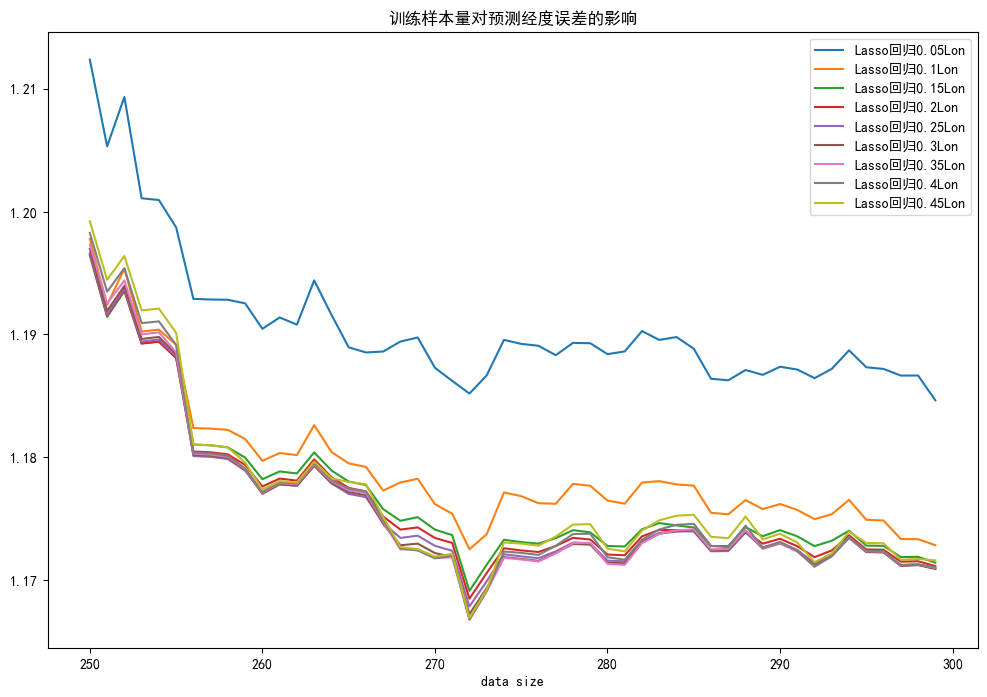

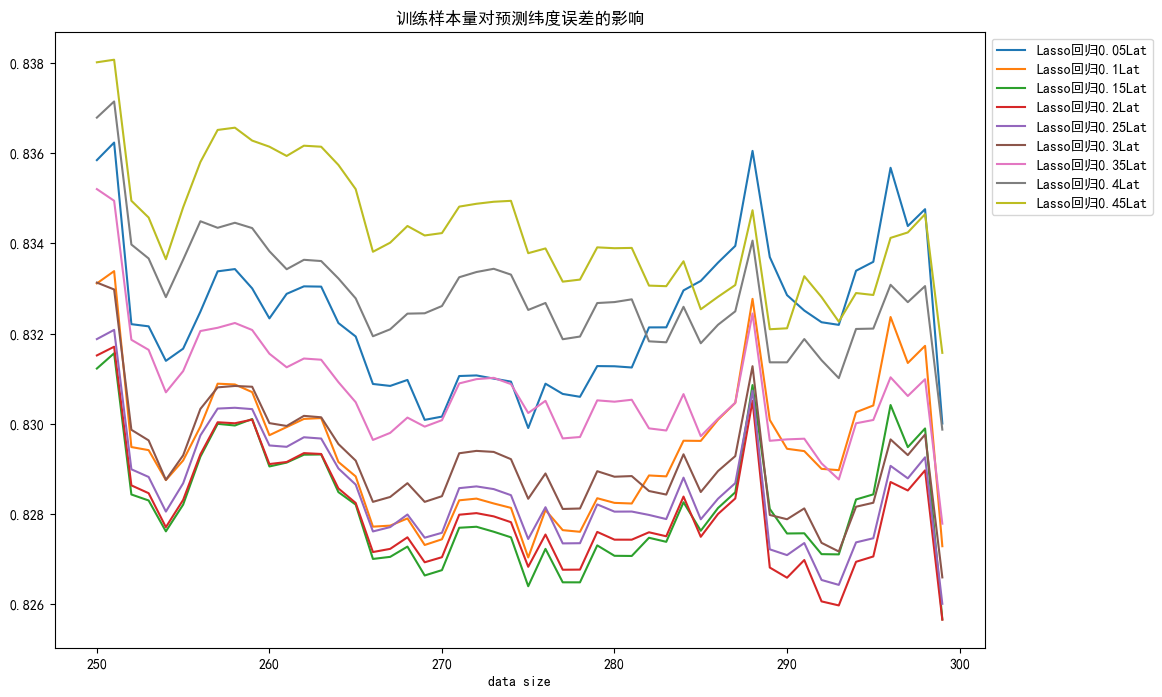

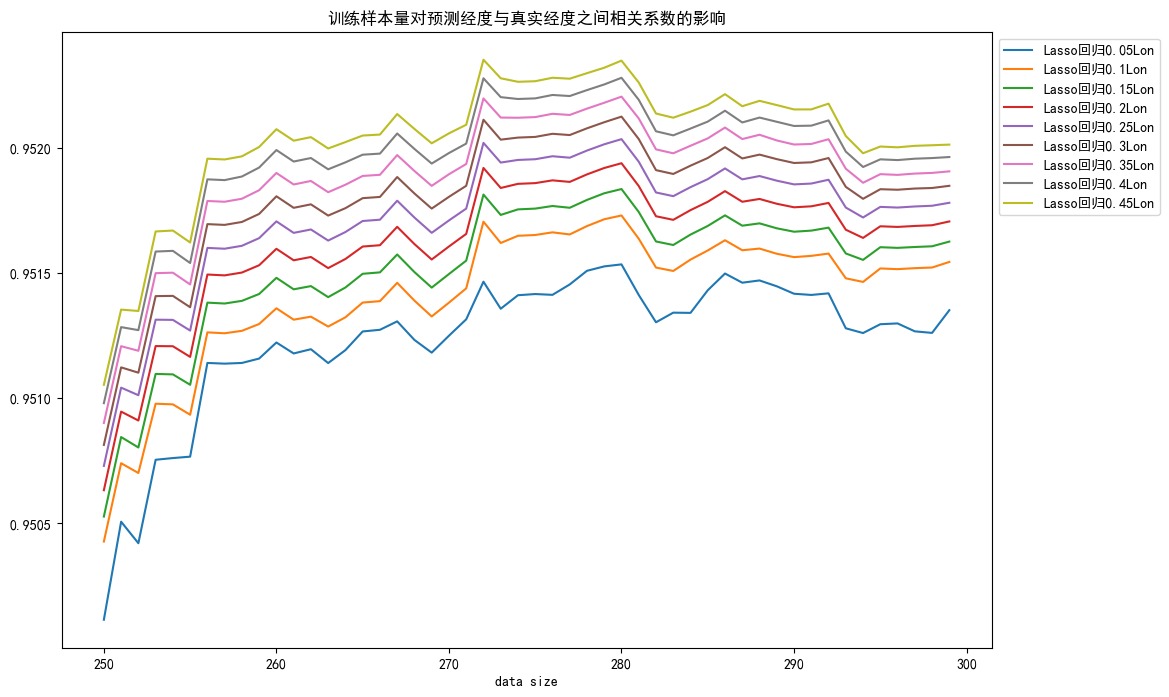

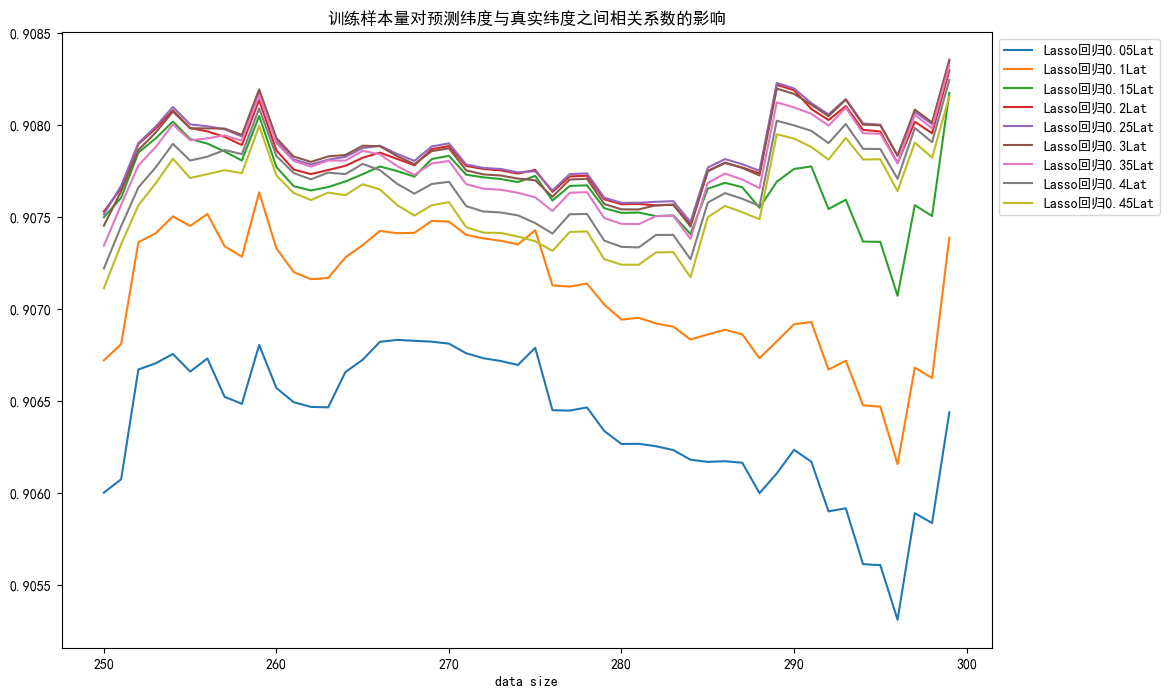

In [27]:
import matplotlib as mpl
import string
import pandas as pd

mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
import seaborn as sns

sns.set_style({"font.sans-serif": ['simhei', 'Arial']})

data_all = {'data size': []}
data_Lon_Err = {'data size': []}
data_Lat_Err = {'data size': []}
data_Lon_corr = {'data size': []}
data_Lat_corr = {'data size': []}

for i in range(1, 10):
    s = u'Lasso回归' + str(i / 20)
    data_all[s] = []
    data_Lon_Err[s + 'Lon'] = []
    data_Lat_Err[s + 'Lat'] = []
    data_Lon_corr[s + 'Lon'] = []
    data_Lat_corr[s + 'Lat'] = []

for train_num in range(250, 300, 1):
    rawtraindata = rawdata[:train_num]
    rawtestdata = rawdata[300:]
    trainX = rawtraindata[:, :-2]
    lonTrainY = rawtraindata[:, -2]
    latTrainY = rawtraindata[:, -1]
    testX = rawtestdata[:, :-2]
    lonTestY = np.array(rawtestdata[:, -2])
    latTestY = np.array(rawtestdata[:, -1])

    data_all['data size'].append(train_num)
    data_Lon_Err['data size'].append(train_num)
    data_Lat_Err['data size'].append(train_num)
    data_Lon_corr['data size'].append(train_num)
    data_Lat_corr['data size'].append(train_num)

    for i in range(1, 10):
        key = i / 20
        clf = linear_model.Lasso(alpha=key)

        s = s = u'Lasso回归' + str(i / 20)
        # 构建模型

        clf.fit(trainX, lonTrainY)  # 训练经度模型
        lonyHat = clf.predict(testX)  # 使用经度模型去预测经度
        clf.fit(trainX, latTrainY)  # 训练纬度模型
        latyHat = clf.predict(testX)  # 使用纬度模型去预测纬度
        # 经度误差
        absErrorLon = absError(lonTestY, lonyHat)
        # 纬度误差
        absErrorLat = absError(latTestY, latyHat)
        absErrorLen = 110 * sqrt(absErrorLon**2 + absErrorLat**2)

        data_all[s].append(absErrorLen)
        data_Lon_Err[s + 'Lon'].append(absErrorLon)
        data_Lat_Err[s + 'Lat'].append(absErrorLat)
        data_Lon_corr[s + 'Lon'].append(np.corrcoef(lonyHat, lonTestY)[0][1])
        data_Lat_corr[s + 'Lat'].append(np.corrcoef(latyHat, latTestY)[0][1])
s = "Lasso回归"
titles = [
    u'训练样本量对预测距离误差的影响', u'训练样本量对预测经度误差的影响', u'训练样本量对预测纬度误差的影响',
    u'训练样本量对预测经度与真实经度之间相关系数的影响', u'训练样本量对预测纬度与真实纬度之间相关系数的影响'
]

data_all = pd.DataFrame(data_all)
data_all.set_index(['data size'], inplace=True)
data_all.plot(figsize=(12, 8), title=titles[0])

plt.legend(bbox_to_anchor=(1.0, 1))
plt.savefig(s + titles[0])

data_Lon_Err = pd.DataFrame(data_Lon_Err)
data_Lon_Err.set_index(['data size'], inplace=True)
data_Lon_Err.plot(kind='line', figsize=(12, 8), title=titles[1])
plt.legend(bbox_to_anchor=(1.0, 1))
plt.savefig(s + titles[1])

data_Lat_Err = pd.DataFrame(data_Lat_Err)
data_Lat_Err.set_index(['data size'], inplace=True)
data_Lat_Err.plot(kind='line', figsize=(12, 8), title=titles[2])
plt.legend(bbox_to_anchor=(1.0, 1))
plt.savefig(s + titles[2])

data_Lon_corr = pd.DataFrame(data_Lon_corr)
data_Lon_corr.set_index(['data size'], inplace=True)
data_Lon_corr.plot(kind='line', figsize=(12, 8), title=titles[3])
plt.legend(bbox_to_anchor=(1.0, 1))
plt.savefig(s + titles[3])

data_Lat_corr = pd.DataFrame(data_Lat_corr)
data_Lat_corr.set_index(['data size'], inplace=True)
data_Lat_corr.plot(kind='line', figsize=(12, 8), title=titles[4])
plt.legend(bbox_to_anchor=(1.0, 1))
plt.savefig(s + titles[4])

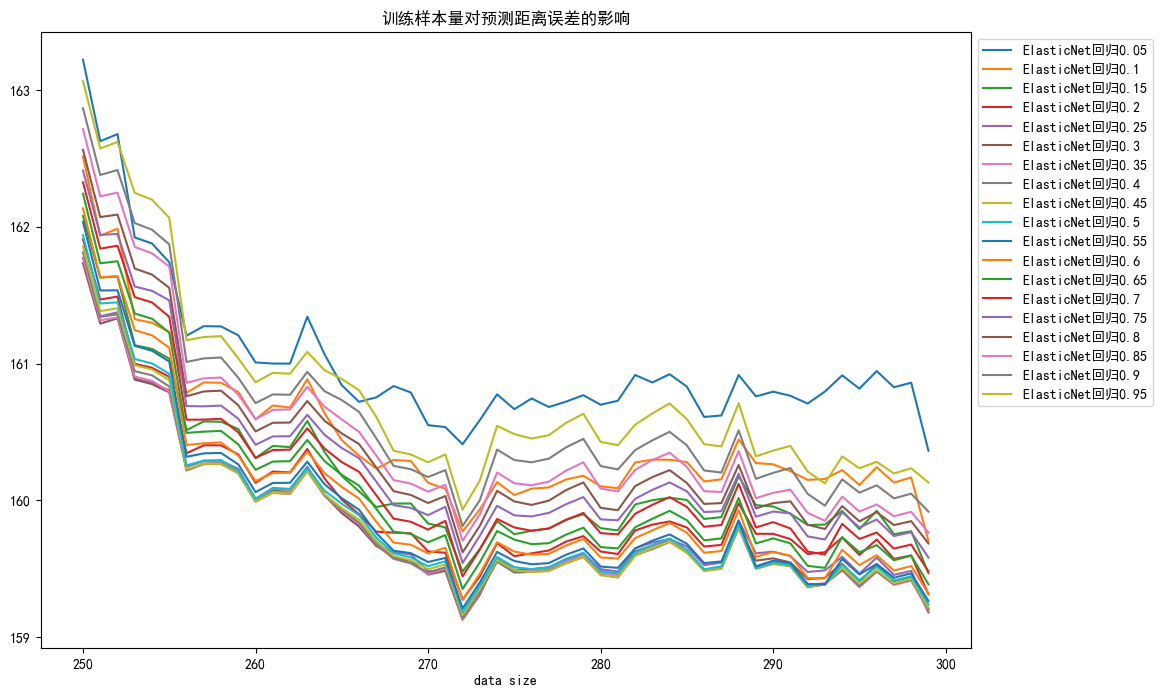

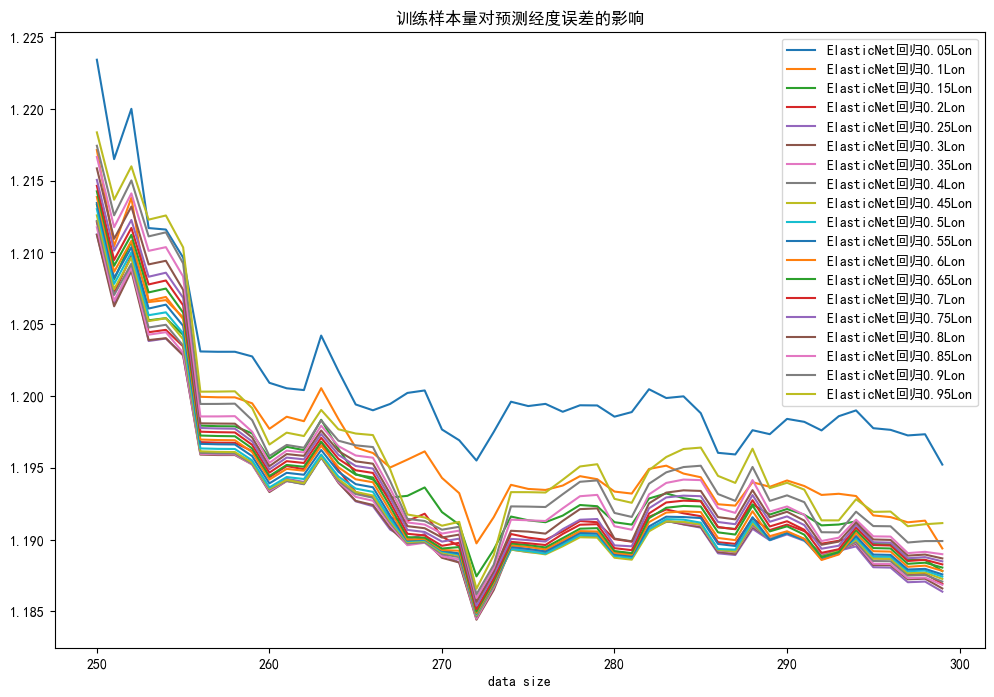

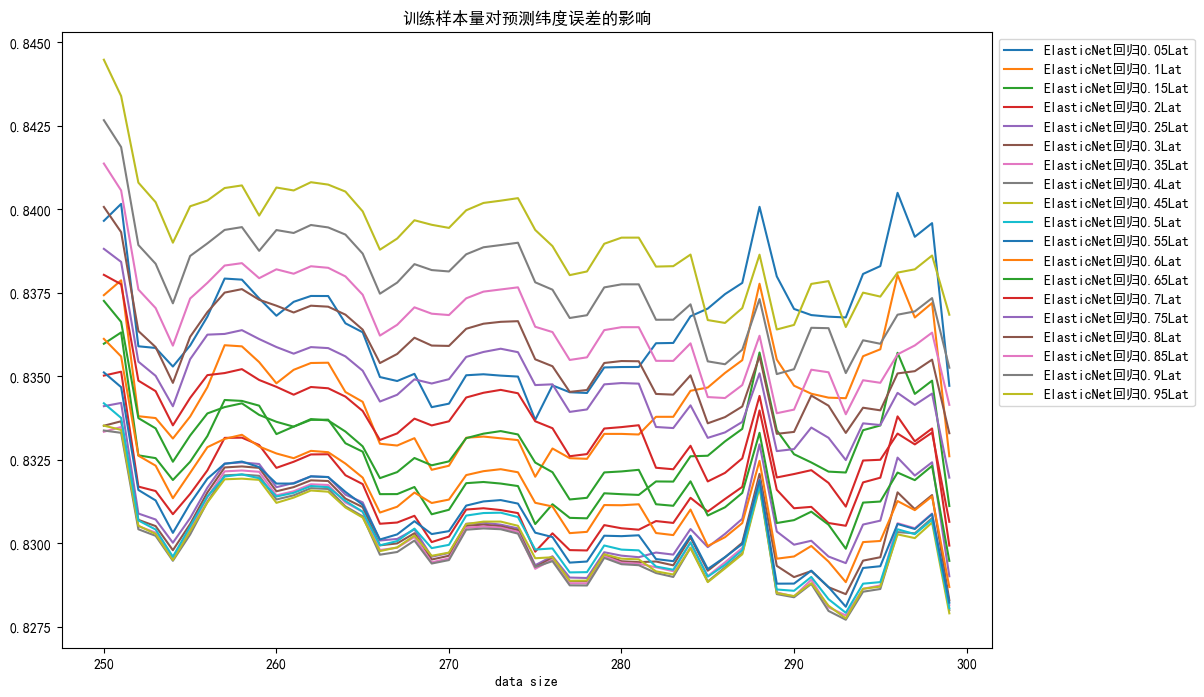

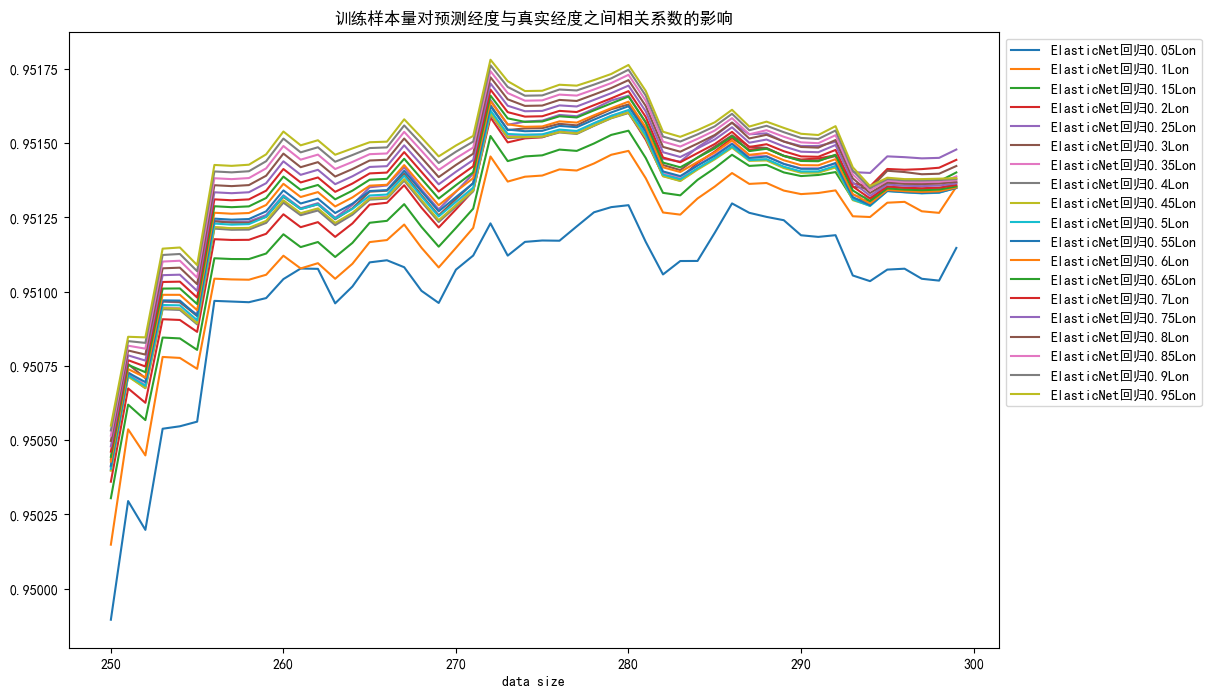

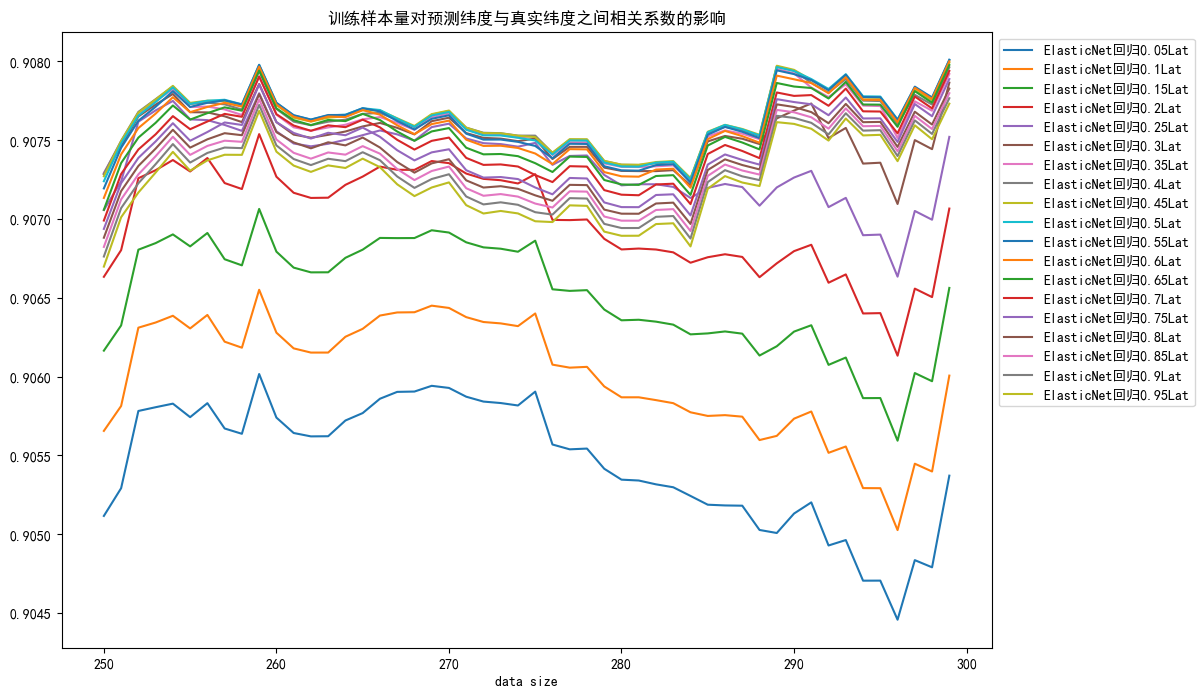

In [28]:
import matplotlib as mpl
import string
import pandas as pd

mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
import seaborn as sns

sns.set_style({"font.sans-serif": ['simhei', 'Arial']})

data_all = {'data size': []}
data_Lon_Err = {'data size': []}
data_Lat_Err = {'data size': []}
data_Lon_corr = {'data size': []}
data_Lat_corr = {'data size': []}

for i in range(1, 20):
    s = u'ElasticNet回归' + str(i / 20)
    data_all[s] = []
    data_Lon_Err[s + 'Lon'] = []
    data_Lat_Err[s + 'Lat'] = []
    data_Lon_corr[s + 'Lon'] = []
    data_Lat_corr[s + 'Lat'] = []

for train_num in range(250, 300, 1):
    rawtraindata = rawdata[:train_num]
    rawtestdata = rawdata[300:]
    trainX = rawtraindata[:, :-2]
    lonTrainY = rawtraindata[:, -2]
    latTrainY = rawtraindata[:, -1]
    testX = rawtestdata[:, :-2]
    lonTestY = np.array(rawtestdata[:, -2])
    latTestY = np.array(rawtestdata[:, -1])

    data_all['data size'].append(train_num)
    data_Lon_Err['data size'].append(train_num)
    data_Lat_Err['data size'].append(train_num)
    data_Lon_corr['data size'].append(train_num)
    data_Lat_corr['data size'].append(train_num)

    for i in range(1, 20):
        key = i / 20
        s = s = u'ElasticNet回归' + str(i / 20)
        # 构建模型
        clf = linear_model.ElasticNet(alpha=key, max_iter=1000)  # 岭回归
        clf.fit(trainX, lonTrainY)  # 训练经度模型
        lonyHat = clf.predict(testX)  # 使用经度模型去预测经度
        clf.fit(trainX, latTrainY)  # 训练纬度模型
        latyHat = clf.predict(testX)  # 使用纬度模型去预测纬度
        # 经度误差
        absErrorLon = absError(lonTestY, lonyHat)
        # 纬度误差
        absErrorLat = absError(latTestY, latyHat)
        absErrorLen = 110 * sqrt(absErrorLon**2 + absErrorLat**2)

        data_all[s].append(absErrorLen)
        data_Lon_Err[s + 'Lon'].append(absErrorLon)
        data_Lat_Err[s + 'Lat'].append(absErrorLat)
        data_Lon_corr[s + 'Lon'].append(np.corrcoef(lonyHat, lonTestY)[0][1])
        data_Lat_corr[s + 'Lat'].append(np.corrcoef(latyHat, latTestY)[0][1])

s = "ElasticNet回归"
titles = [
    u'训练样本量对预测距离误差的影响', u'训练样本量对预测经度误差的影响', u'训练样本量对预测纬度误差的影响',
    u'训练样本量对预测经度与真实经度之间相关系数的影响', u'训练样本量对预测纬度与真实纬度之间相关系数的影响'
]

data_all = pd.DataFrame(data_all)
data_all.set_index(['data size'], inplace=True)
data_all.plot(figsize=(12, 8), title=titles[0])

plt.legend(bbox_to_anchor=(1.0, 1))
plt.savefig(s + titles[0])

data_Lon_Err = pd.DataFrame(data_Lon_Err)
data_Lon_Err.set_index(['data size'], inplace=True)
data_Lon_Err.plot(kind='line', figsize=(12, 8), title=titles[1])
plt.legend(bbox_to_anchor=(1.0, 1))
plt.savefig(s + titles[1])

data_Lat_Err = pd.DataFrame(data_Lat_Err)
data_Lat_Err.set_index(['data size'], inplace=True)
data_Lat_Err.plot(kind='line', figsize=(12, 8), title=titles[2])
plt.legend(bbox_to_anchor=(1.0, 1))
plt.savefig(s + titles[2])

data_Lon_corr = pd.DataFrame(data_Lon_corr)
data_Lon_corr.set_index(['data size'], inplace=True)
data_Lon_corr.plot(kind='line', figsize=(12, 8), title=titles[3])
plt.legend(bbox_to_anchor=(1.0, 1))
plt.savefig(s + titles[3])

data_Lat_corr = pd.DataFrame(data_Lat_corr)
data_Lat_corr.set_index(['data size'], inplace=True)
data_Lat_corr.plot(kind='line', figsize=(12, 8), title=titles[4])
plt.legend(bbox_to_anchor=(1.0, 1))
plt.savefig(s + titles[4])

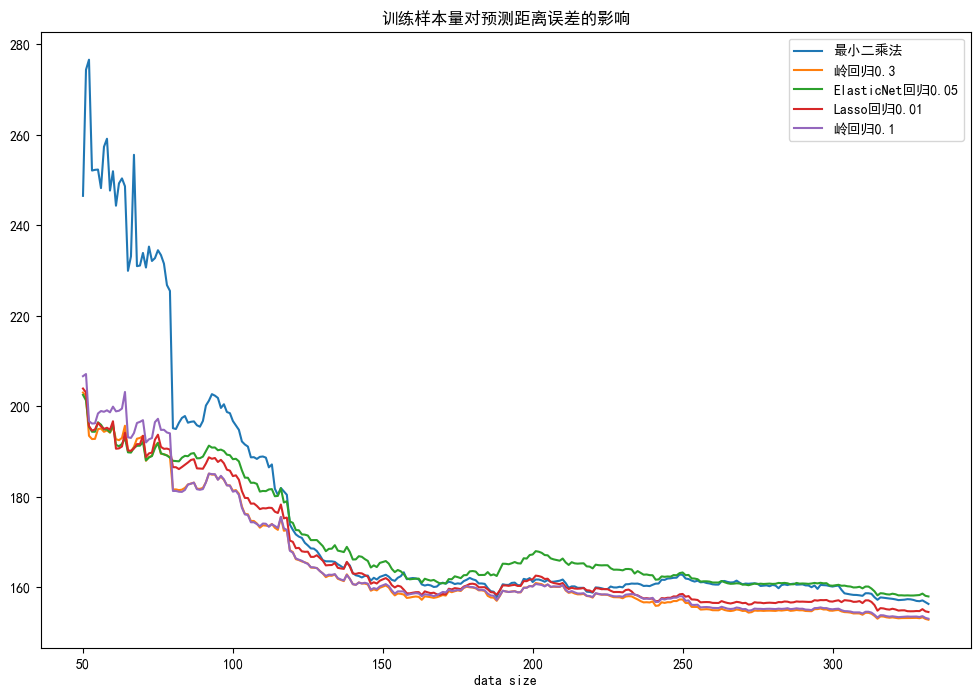

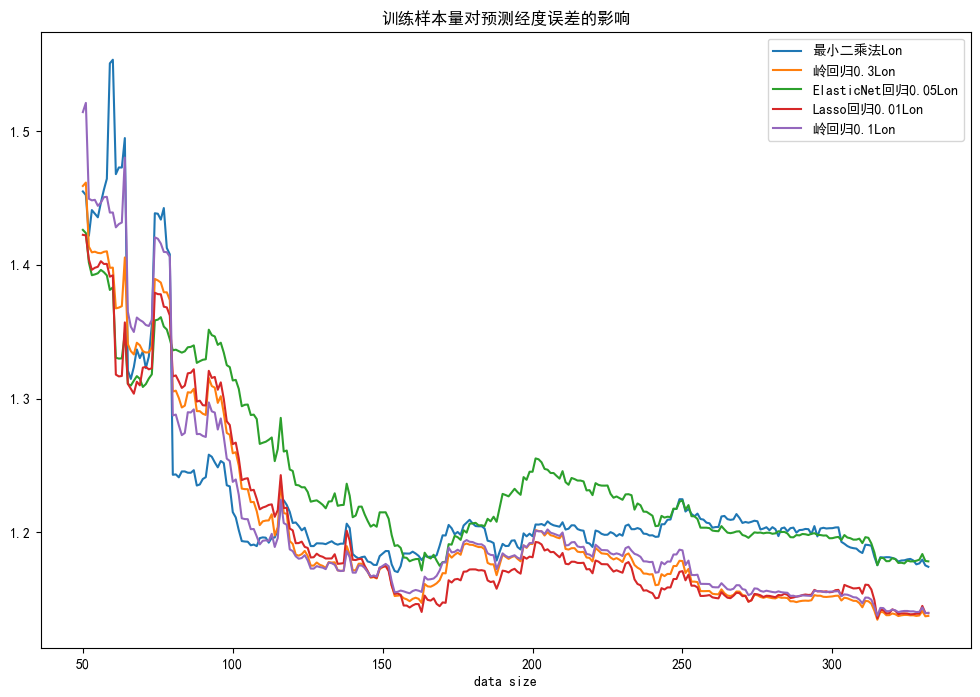

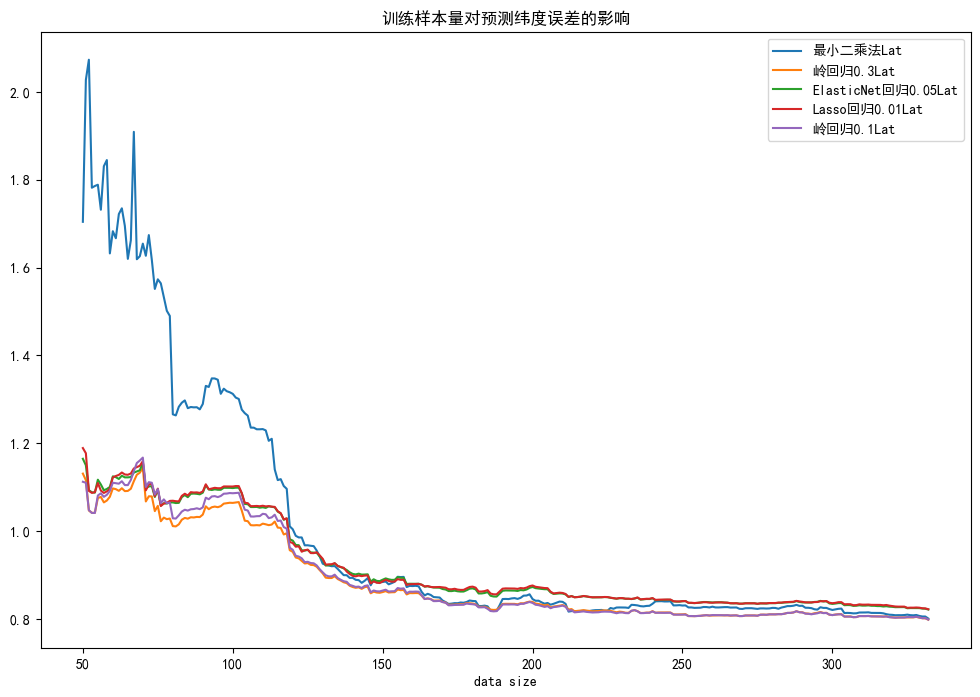

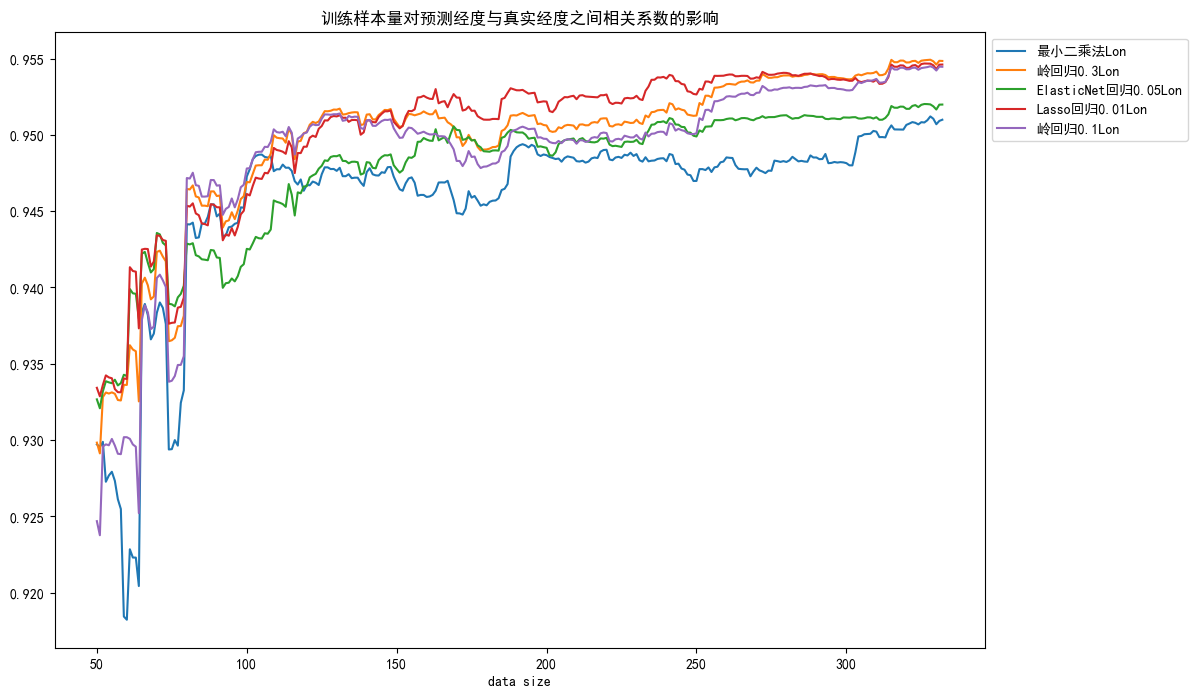

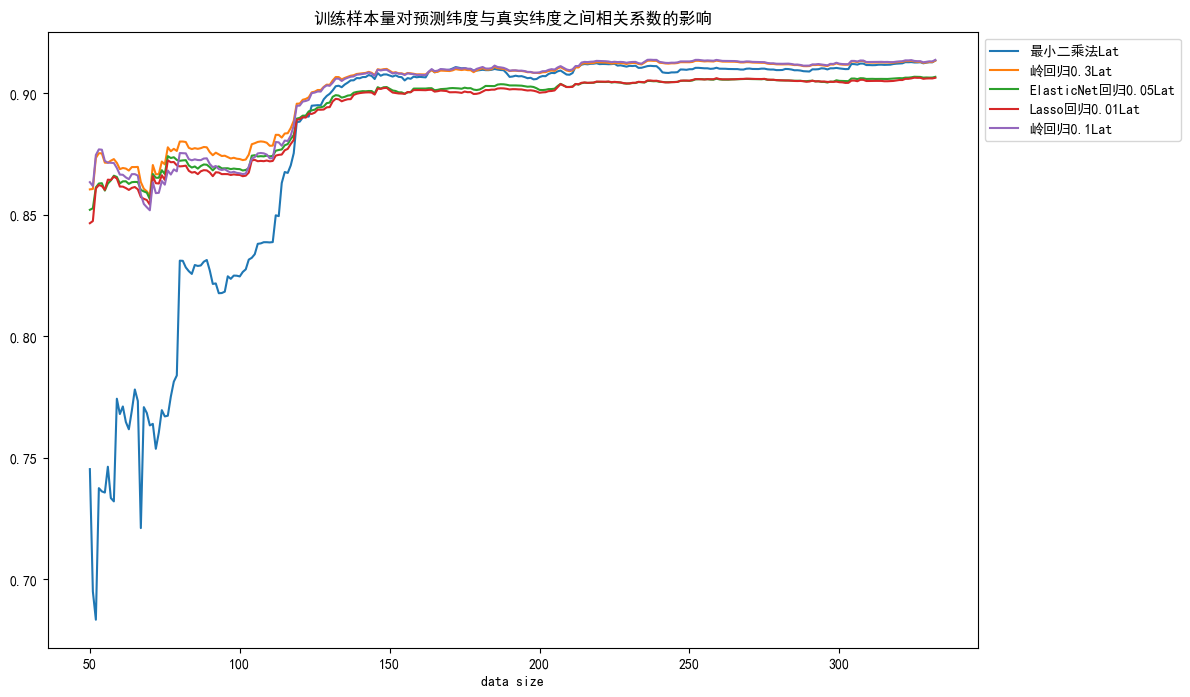

In [29]:
import matplotlib as mpl
import string
import pandas as pd 
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
import seaborn as sns
sns.set_style({"font.sans-serif":['simhei', 'Arial']})

func_name_list = [u'最小二乘法',u'岭回归0.3',u'ElasticNet回归0.05',u'Lasso回归0.01'
                ,u'岭回归0.1']
func_list = ["linear_model.LinearRegression()"," linear_model.Ridge (alpha = 0.3)",
            " linear_model.ElasticNet(alpha=0.05,max_iter=50000)","linear_model.Lasso(alpha=0.01,max_iter=100000)","linear_model.Ridge (alpha = 0.1)"]

data_all = {'data size':[]}
data_Lon_Err = {'data size':[]}
data_Lat_Err = {'data size':[]}
data_Lon_corr = {'data size':[]}
data_Lat_corr = {'data size':[]}

;
for s in func_name_list:
    data_all[s]=[]
    data_Lon_Err[s+'Lon']=[]
    data_Lat_Err[s+'Lat']=[]
    data_Lon_corr[s+'Lon']=[]
    data_Lat_corr[s+'Lat']=[]


for train_num in range(50, 333, 1):
    rawtraindata = rawdata[:train_num]
    rawtestdata = rawdata[300:]
    trainX = rawtraindata[:,:-2]
    lonTrainY = rawtraindata[:,-2]
    latTrainY = rawtraindata[:,-1]
    testX = rawtestdata[:,:-2]
    lonTestY = np.array(rawtestdata[:,-2])
    latTestY = np.array(rawtestdata[:,-1])
    
    data_all['data size'].append(train_num)
    data_Lon_Err['data size'].append(train_num)
    data_Lat_Err['data size'].append(train_num)
    data_Lon_corr['data size'].append(train_num)
    data_Lat_corr['data size'].append(train_num)
    
    
    for i in range(len(func_list)):
        s = func_name_list[i]
        # 构建模型
        func = func_list[i]

        exec("clf="+func)


        clf.fit (trainX, lonTrainY) # 训练经度模型
        lonyHat = clf.predict(testX) # 使用经度模型去预测经度
        clf.fit (trainX, latTrainY) # 训练纬度模型
        latyHat = clf.predict(testX) # 使用纬度模型去预测纬度
        # 经度误差
        absErrorLon = absError(lonTestY,lonyHat)
        # 纬度误差
        absErrorLat = absError(latTestY,latyHat)
        absErrorLen = 110 * sqrt(absErrorLon**2 + absErrorLat**2)

        data_all[s].append(absErrorLen)
        data_Lon_Err[s+'Lon'].append(absErrorLon)
        data_Lat_Err[s+'Lat'].append(absErrorLat)
        data_Lon_corr[s+'Lon'].append(np.corrcoef(lonyHat, lonTestY)[0][1])           
        data_Lat_corr[s+'Lat'].append(np.corrcoef(latyHat, latTestY)[0][1])
        
s = "total"
titles = [u'训练样本量对预测距离误差的影响',
           u'训练样本量对预测经度误差的影响',
          u'训练样本量对预测纬度误差的影响',
          u'训练样本量对预测经度与真实经度之间相关系数的影响',
          u'训练样本量对预测纬度与真实纬度之间相关系数的影响']


data_all = pd.DataFrame(data_all)
data_all.set_index(['data size'], inplace=True)
data_all.plot( figsize=(12,8), title=titles[0])

plt.legend(bbox_to_anchor=(1.0, 1))
plt.savefig(s+titles[0])

data_Lon_Err = pd.DataFrame(data_Lon_Err)
data_Lon_Err.set_index(['data size'], inplace=True)
data_Lon_Err.plot(kind='line', figsize=(12,8),
             title=titles[1])
plt.legend(bbox_to_anchor=(1.0, 1))
plt.savefig(s+titles[1])

data_Lat_Err = pd.DataFrame(data_Lat_Err)
data_Lat_Err.set_index(['data size'], inplace=True)
data_Lat_Err.plot(kind='line', figsize=(12,8),
             title=titles[2])
plt.legend(bbox_to_anchor=(1.0, 1))
plt.savefig(s+titles[2])

data_Lon_corr = pd.DataFrame(data_Lon_corr)
data_Lon_corr.set_index(['data size'], inplace=True)
data_Lon_corr.plot(kind='line', figsize=(12,8),
             title=titles[3])
plt.legend(bbox_to_anchor=(1.0, 1))
plt.savefig(s+titles[3])

data_Lat_corr = pd.DataFrame(data_Lat_corr)
data_Lat_corr.set_index(['data size'], inplace=True)
data_Lat_corr.plot(kind='line', figsize=(12,8),
             title=titles[4])
plt.legend(bbox_to_anchor=(1.0, 1))
plt.savefig(s+titles[4])

In [30]:
#lat
rawdata = loadDataSet('./data/typhoon.dat').iloc[:,:].values
testX = loadDataSet('./data/typhoon200Test_7.dat').iloc[:,:].values
random.shuffle(rawdata)
rawtraindata = rawdata
trainX = rawtraindata[:,:-2]
lonTrainY = rawtraindata[:,-2]
latTrainY = rawtraindata[:,-1]

In [31]:
testX.shape

(200, 16)

In [32]:
clf = linear_model.LinearRegression()
clf.fit (trainX, latTrainY) # 训练经度模型
latyHat = clf.predict(testX) # 使用经度模型去预测经度
# clf.fit (trainX, latTrainY) # 训练纬度模型
# latyHat = clf.predict(testX) # 使用纬度模型去预测纬度
# linear_model.Lasso(alpha=0.01,max_iter=100000)

In [33]:
cif = linear_model.Lasso(alpha=0.01,max_iter=100000)
clf.fit (trainX, lonTrainY) # 训练经度模型
lonyHat = clf.predict(testX)

In [34]:
#f  = open("10175102247-typhoon200Result.dat","a+")
lonyHat

array([114.53633219, 112.01455824, 111.52288843, 112.70270438,
       121.43308774, 114.03375679, 109.47628605, 114.4740768 ,
       107.26943844, 115.05765975, 121.80870694, 111.55290628,
       107.04916348, 109.13244689, 119.52442742, 116.54971787,
       116.32554293, 114.71729875, 108.99979737, 111.94522293,
       109.48359022, 106.44625849, 106.02313256, 118.98079491,
       109.09276704, 110.49873342, 115.82063928, 120.62988205,
       122.17689726, 109.7230161 , 107.46326445, 120.75062132,
       111.40226992, 121.25077522, 114.13188036, 123.96142616,
       105.83225065, 109.58241669, 112.74873391, 121.88712545,
       115.51553269, 109.2183099 , 114.30311105, 109.07489578,
       125.66179164, 106.01980864, 105.26414023, 118.86585444,
       106.10425116, 106.3554417 , 105.14586467, 112.20737793,
       122.42445273, 110.48950461, 116.56895115, 110.56096483,
       114.0817422 , 110.53689902, 113.98359206, 110.94069432,
       113.82096912, 106.73754134, 116.98806564, 108.61

In [35]:
latyHat

array([18.74269989, 17.12056113, 18.47870759, 16.8560454 , 21.2304789 ,
       18.25716352, 18.71012165, 21.76962355, 21.3758297 , 25.1950829 ,
       21.33193864, 24.208657  , 18.83032551, 21.1292396 , 23.16304902,
       17.62445229, 20.3569789 , 20.50097018, 22.36773214, 20.59153319,
       21.77523345, 18.77786337, 23.09736998, 18.13331279, 18.29979237,
       21.32322121, 21.66872855, 22.54834746, 19.53258002, 21.52256596,
       20.10409524, 17.16476565, 19.40683573, 17.88249946, 22.99834268,
       18.77872042, 22.11904079, 18.23854907, 20.57976657, 22.11154333,
       19.08703541, 20.90877652, 18.60758459, 19.90728557, 23.17601333,
       20.51990459, 19.85603529, 23.07215746, 20.12344673, 19.79154774,
       21.08424525, 18.98718029, 26.12397907, 21.20998822, 22.2175141 ,
       18.72962612, 16.73404571, 21.24330276, 19.02561517, 24.25864895,
       19.81386635, 19.53314394, 19.26593325, 24.44968875, 26.09757958,
       24.03654893, 18.04808545, 17.62223081, 18.11460985, 20.23

In [36]:
f  = open("typhoon200Result.dat",'a+')
for i in range(200):
    f.write(str(lonyHat[i]) + '\t' + str(latyHat[i]) + '\n')